# Принятие решений в бизнесе

# Введение

Я — аналитик крупного интернет-магазина.\
Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.\
Приоритизируем гипотезы и запустим A/B-тест а затем проанализируем результаты. 

## Цель выявить наиболее эффективные гипотезы для повышения выручки интернет-магазина.
## Разобем задачу на 2 части 
### Часть 1. Приоритизация гипотез. В дата-сете "hypothesis.csv" находятся гипотезы по увеличению выручки интернет-магазина.
Наша задача с помощю приоритизации гипотез ICE и RICE отделить наиболее перспективные гипотезы от менее перспективных а так же выявить различия между методами приоритизации гипотез ICE и RICE.\
Датасет с гипотезами согласно документации содержит следующие данные:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

------

### Часть 2. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах "orders.csv" и "visitors.csv".

Датасет с информацией о заказах согласно документации содержит следующие данные:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет с информацией о посещениях согласно документации содержит следующие данные:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Задача состоит в анализе A/B-тест:
- Постройте графики:
    - кумулятивной выручки по группам;
    - кумулятивного среднего чека по группам; 
    - относительного изменения кумулятивного среднего чека группы B к группе A; 
    - кумулятивного среднего количества заказов на посетителя по группам;
    - относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. С;
    - точечный график количества заказов по пользователям;
    - точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте: 
    - 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей;
    - 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов;
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения;
    - статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения;
    - статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения;
    -  статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
- Примите решение по результатам теста и объясните его.

------

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

Введение принято!
</div>

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

In [2]:
# откроем датасеты.
try:
    hypothesis,orders,visitors = (
                        pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv'), # гипотезы
                        pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv'),  # заказы
                        pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv'),)  # посещения
except:
    hypothesis,orders,visitors = (
                        pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
                        pd.read_csv('/datasets/orders.csv'),  # заказы
                        pd.read_csv('/datasets/visitors.csv'),) # посещения 

<div class="alert alert-success">
    <b>✅ Комментарий ревьюера:</b>

👍 за конструкцию try-except!
</div>

# Часть 1. Приоритизация гипотез.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

Датасет с гипотезами содержат 9 гипотез и 5 столбцов, не имеет дубликатов.

### Применим фреймворк ICE для приоритизации гипотез.

In [6]:
# ICE = (Impact*Confidence)/Efforts
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis_ice = hypothesis[['Hypothesis', 'ICE']]
# Отсортируем показатель по убыванию приоритета.
hypothesis_ice = round(hypothesis_ice.sort_values(by='ICE', ascending=False).reset_index(),2)
hypothesis_ice

,index,Hypothesis,ICE
0,8,"Запустить акцию, дающую скидку на товар в день...",16.20
1,0,"Добавить два новых канала привлечения трафика,...",13.33
2,7,Добавить форму подписки на все основные страни...,11.20
3,6,Показать на главной странице баннеры с актуаль...,8.00
4,2,Добавить блоки рекомендаций товаров на сайт ин...,7.00
5,1,"Запустить собственную службу доставки, что сок...",2.00
6,5,"Добавить страницу отзывов клиентов о магазине,...",1.33
7,3,"Изменить структура категорий, что увеличит кон...",1.12
8,4,"Изменить цвет фона главной страницы, чтобы уве...",1.00


Выделяются три самых перспективных гипотез, а именно:
- Запустить акцию, дающую скидку на товар в день рождения (16.20);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.33);
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.20).

Самыми слабыми гипотезами выступают:
- Запустить собственную службу доставки, что сократит срок доставки заказов (1.33);
- Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар (1.12);
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей (1).

От слабых гипотез стоит отказаться. Посмотрим как изменится ситуация с фреймворком RICE.

### Применим фреймворк RICE для приоритизации гипотез. 

In [7]:
# RICE = (Reach*Impact*Confidence)/Efforts
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis_rice = hypothesis[['Hypothesis', 'RICE']]
# Отсортируем показатель по убыванию приоритета.

hypothesis_rice = hypothesis_rice.sort_values(by='RICE', ascending=False).reset_index()
hypothesis_rice

,index,Hypothesis,RICE
0,7,Добавить форму подписки на все основные страни...,112.0
1,2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
2,0,"Добавить два новых канала привлечения трафика,...",40.0
3,6,Показать на главной странице баннеры с актуаль...,40.0
4,8,"Запустить акцию, дающую скидку на товар в день...",16.2
5,3,"Изменить структура категорий, что увеличит кон...",9.0
6,1,"Запустить собственную службу доставки, что сок...",4.0
7,5,"Добавить страницу отзывов клиентов о магазине,...",4.0
8,4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


In [8]:
# для отображения всех столбцов с описанием гипотез воспользуемся настройкой pd.set_option
pd.set_option('display.max_colwidth', 0)

In [9]:
hypothesis_rice.merge(hypothesis_ice)

,index,Hypothesis,RICE,ICE
0,7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
1,2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
2,0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
3,6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
4,8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
5,3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
6,1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
7,5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
8,4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


Наиболее перспективная гипотеза приоритизации задач с помошью фреймворка RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (112);
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (56);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (40);
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (40).

Самыми слабыми выступают гипотезы:
- Запустить собственную службу доставки, что сократит срок доставки заказов (4);
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов (4);
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей (4).

 ### Посмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE.

Так как способ приоритизации задач - RICE включает параметр Reach (оценка силы охвата изменений на пользователей) то он отличается от показателей полученых от применения фреймворка ICE

Наиболее слабыми гипотезами в обоих фрейморках выступают гипотезы: 
- 1 Запустить собственную службу доставки, что сократит срок доставки заказов (ICE 2)(RICE 4) 
- 4 Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей (ICE 1) (RICE 4)
- 5 Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов (ICE 1.33) (RICE 4) 
- 3 Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар (ICE 1.12) (RICE 9.0 )

От них стоит отказаться так как затраты на эти гипотезы никогда себя не окупят.

В обоих фреймворках наиболее удачными гипотезами которые стоит проверить выступают:
- 0 Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (ICE 13.33) (RICE 40) 
- 7 Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (ICE 11.20) (RICE 112)

При этом гипотеза  - 6 Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию (ICE  8) (RICE 40) так и осталась в обоих случаях на 4 месте.

Сильнее всего изменились две гипотезы:
- 8 Запустить акцию, дающую скидку на товар в день рождения (ICE 8.00) (RICE 16.20) опустилась на 4 пункта так как уверенность у гипотезы высокая но охват и влияние низкое.

Наиболее перспективная гипотеза приоритизации задач с помошью фреймворка RICE:
- 2 Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа (ICE 7.00) (RICE 56) поднялась на 3 пункта (с 5 места по 2) так как охват у гипотезы высокий но влияние низкое.

# Часть 2. Анализ A/B-теста

In [10]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В датасете с заказами 5 столбцов и 1197 строк. Данных достаточно для проведения A/B тестирования. Для екселя, еще есть возможность для обработки такого кол-ва записей. Но он будет обрабатывать такое кол-во данных на пределе сил. Для Sql это слишком маленькая выборка. По этому лучше всего воспользоваться силами Python.

In [12]:
# изменим тип данных  в столбце с датами
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
print(orders['date'].min())
print(orders['date'].max())
print(orders['date'].max()-orders['date'].min())

2019-08-01 00:00:00
2019-08-31 00:00:00
30 days 00:00:00


Тестирование проводилось с 1 августа 2019 года по 31 августа 2019 года.

In [14]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

<AxesSubplot:>

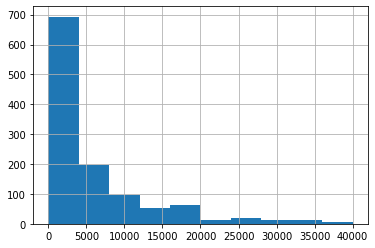

In [15]:
orders['revenue'].hist(range = (1,40000))

In [16]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

группа 'B' больше выборки 'A' возможно в группе 'B' больше пользователей которые 2 и более раза совершали заказ.

In [17]:
group_orders = orders.groupby('group')['visitorId'].nunique()
group_orders

group
A    503
B    586
Name: visitorId, dtype: int64

In [18]:
print(group_orders['B']/(group_orders['A']+group_orders['B'])*100)
print(group_orders['A']/(group_orders['A']+group_orders['B'])*100)

53.81083562901745
46.18916437098255


группа 'B' больше группы 'A' на 7.63 %

In [19]:
print(orders['visitorId'].duplicated().sum())
print(orders['transactionId'].duplicated().sum())

166
0


У заказов дубликаты отсутствуют. Посетители могут и за день делать разные заказы. 

Проверим столбец с посешением.

In [20]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


3 столбца с 62 значениями.

Переведем даты к необходимому формату

In [22]:
# изменим тип данных  в столбце с датами
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [23]:
print(visitors['date'].min())
print(visitors['date'].max())
print(visitors['date'].max()-orders['date'].min())

2019-08-01 00:00:00
2019-08-31 00:00:00
30 days 00:00:00


Период тот же что и в датасете с заказами.

In [24]:
visitors['visitors'].describe()

count    62.000000 
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visitors, dtype: float64

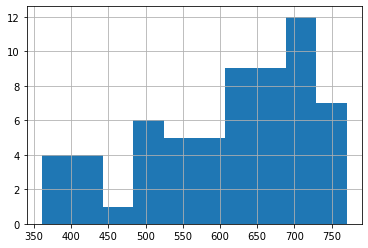

In [25]:
visitors['visitors'].hist();

In [26]:
visitors['group'].value_counts()

A    31
B    31
Name: group, dtype: int64

Данные по датасету с посещением проверены, даты приведены к необходимым форматам данных.

In [27]:
print(orders.info())
print(visitors.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


----------------

Данные проверены, можно начинать подготовку к проведению A/B тестированию

In [28]:
orders_dupl = orders[['visitorId','group']]
orders_dupl[orders_dupl['visitorId'].duplicated()].sort_values(by = 'visitorId')

,visitorId,group
703,8300375,A
823,199603092,A
246,199603092,B
1102,199603092,A
134,199603092,A
...,...,...
873,4256040402,B
901,4256040402,A
187,4256040402,A
114,4256040402,A


В датасете присутствуют пользователи в обоеих группах, но мы не сможем удалить их из таблицы с посещениями т.к. информации в этой таблице - какие пользователи из каких групп мы, не знаем.

In [29]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [30]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [31]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])
].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [32]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам стандартные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData) 

         date group  orders  buyers  revenue  visitors
0  2019-08-01  A     24      20      148579   719     
1  2019-08-01  B     21      20      101217   713     
2  2019-08-02  A     44      38      242401   1338    
3  2019-08-02  B     45      43      266748   1294    
4  2019-08-03  A     68      62      354874   1845    
..        ... ..     ..      ..         ...    ...    
57 2019-08-29  B     596     544     5559398  17708   
58 2019-08-30  A     545     493     4022970  18037   
59 2019-08-30  B     620     567     5774631  18198   
60 2019-08-31  A     557     503     4084803  18736   
61 2019-08-31  B     640     586     5907760  18916   

[62 rows x 6 columns]


In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Данные готовы к построению графиков

### Построим график кумулятивной выручки по группам.

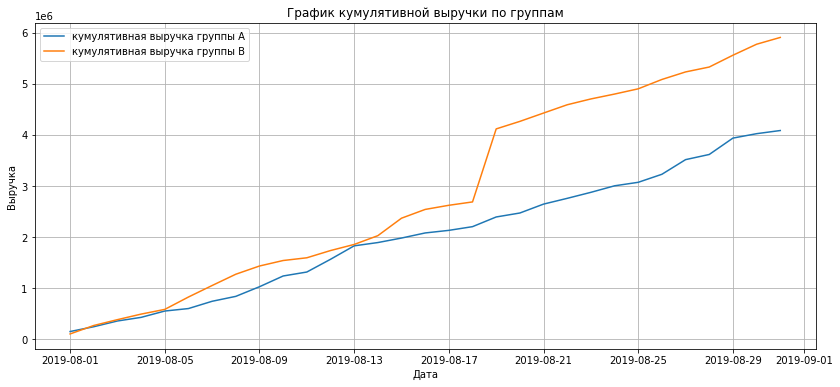

In [34]:
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='кумулятивная выручка группы A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='кумулятивная выручка группы B')
plt.legend();

Кумулятивная выручка по обоим группам, растет до конца периода. 
Примерно с 15 августа, группа B начала стремительно расти и увеличивать разницу в отношении роста группы А.
После резкого роста группы B выручка продолжала расти.
На рост группы B примерно 18-19 августа сильно повлиял большой заказ, возможно, это аномалия. 

In [35]:
cumulativeRevenueB[(cumulativeRevenueB['date'] >= '2019-08-18') & (cumulativeRevenueB['date'] <= '2019-08-19')]

,date,revenue,orders
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403


In [36]:
orders[(orders['group']=='B') & (orders['date'] == '2019-08-19')].sort_values(by='revenue', ascending=False).head()

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
527,1570513684,2837914161,2019-08-19,33405,B
461,2683113224,154576532,2019-08-19,26550,B
368,3268879337,2536252163,2019-08-19,20026,B
463,4170537404,290022471,2019-08-19,16480,B


Заказ № 590470918 на общую сумму 1 294 тыс. руб. явно является аномалией.

### Постройте график кумулятивного среднего чека по группам.

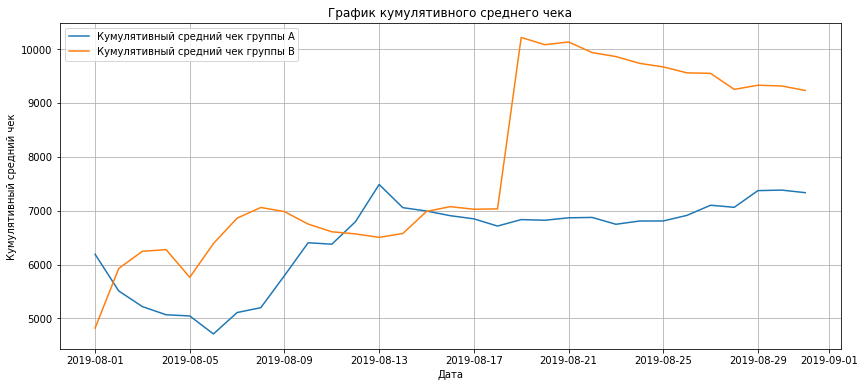

In [37]:


plt.figure(figsize=(14,6))
plt.grid()
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Кумулятивный средний чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Кумулятивный средний чек группы B')
plt.legend(); 

Средний чек за представленый период растет у группы 'А' 6 августа наблюдается просадка а 13 августа наоборот пик значения.
У группы "Б" наблюдается аномальное значение заказа № 590470918. После этого крупного заказа наблюдается падение показателя среднего чека.

### Построем график относительного изменения кумулятивного среднего чека группы B к группе A.

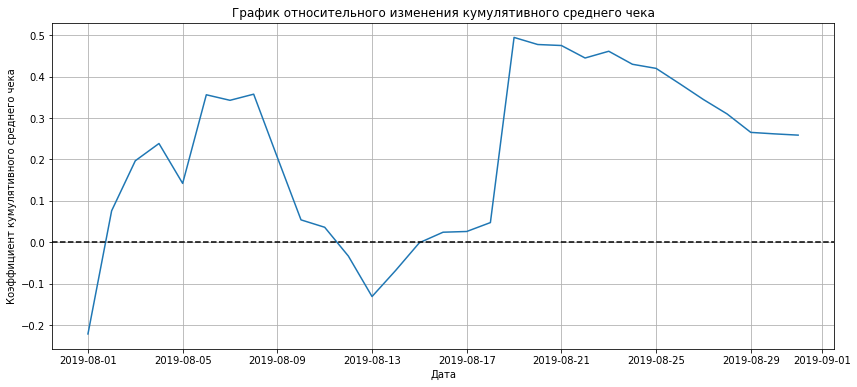

In [38]:
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График относительного изменения кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Коэффициент кумулятивного среднего чека')
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

На нескольких участках графика есть различия между сегментами. Заказ № 590470918 так же отражается на данных 19 августа.
В период с 6 по 8 августа наблюдается резкий рост. А 13 августа наблюдается сильная просадка в суммах.

## Постройем график кумулятивного среднего количества заказов на посетителя по группам.

In [39]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A и B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

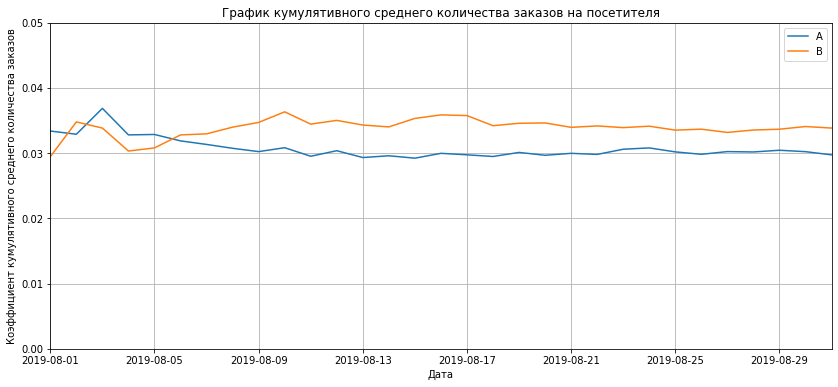

In [40]:
plt.figure(figsize=(14,6))
plt.grid()
plt.title('График кумулятивного среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.ylabel('Коэффициент кумулятивного среднего количества заказов')
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend();

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05]);

Группы колеблются около одного значения в пределах 0.029 по 0.035. Группа "В" 6 августа несильно увеличила коэффициент кумулятивного среднего количества заказов и стала лидером до конца затронутого периода. 

## Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

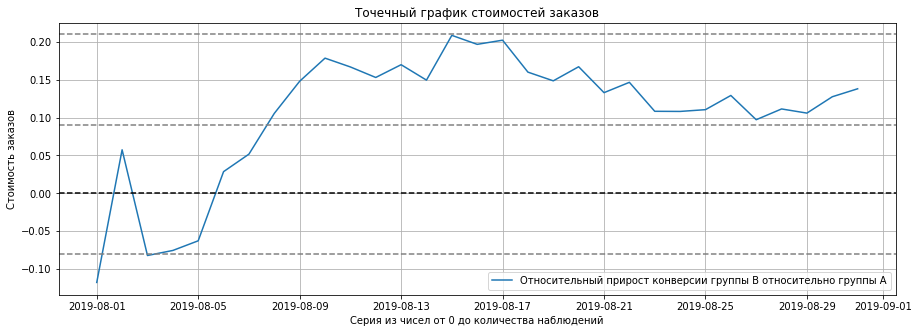

In [41]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title('график относительного изменения кумулятивного среднего количества заказов')
plt.xlabel('Дата')
plt.ylabel('Коэффициент')

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.09, color='grey', linestyle='--')
plt.axhline(y=-0.08, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--');

#plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5]);

Рост начинается с 5 августа. Пик 15 августа и снижение куммулятивного среднего до конца периода.

Стоит проанализировать аномалии, они изменяют картину анализа.

------

## Проанализируем выбросы и всплески значения данных

In [42]:
#Подсчитаем количество заказов по пользователям и посмотрим на результат
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Максимальное количесво заказов за август - 11.

### Постройем точечный график количества заказов по пользователям.

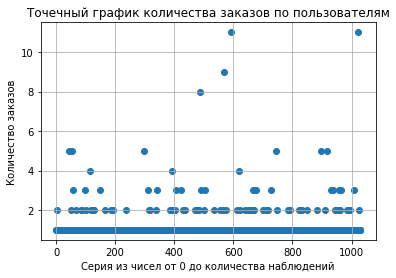

In [43]:
plt.grid()
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Серия из чисел от 0 до количества наблюдений')
plt.ylabel('Количество заказов')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

1,2 - самые распространенные количество заказов. Намного меньше встречаются пользовавтели с заказами  3 и 4. Заказов больше 4 можно считать аномалией.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [44]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не больше 5% пользователей сделали 2 заказа. Не больше 1% пользователей сделали 4 и больше заказов.

Границей для определения аномальных значений мы поставим пользователей сделавших больше 2 заказов. 

### Постройте точечный график стоимостей заказов.

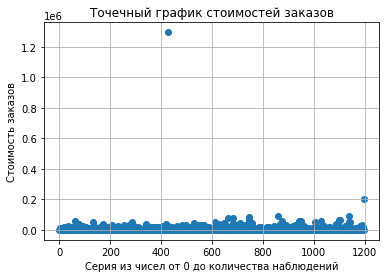

In [45]:
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Серия из чисел от 0 до количества наблюдений')
plt.ylabel('Стоимость заказов')
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

на графике так же есть след от аномально большого заказа.

## Посчитайте 95-й и 99-й перцентили стоимости заказов. 

In [46]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Определив аномальные суммы которые встречаются суммы заказов, можно построить график без этих аномальных значений.

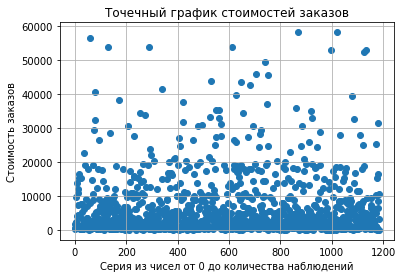

In [47]:
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Серия из чисел от 0 до количества наблюдений')
plt.ylabel('Стоимость заказов')
sort_orders = orders[orders['revenue']<=58233.2]['revenue']
x_values = pd.Series(range(0, len(sort_orders)))
plt.scatter(x_values, sort_orders);

Теперь на графике отображается намного больше значений.

Границей для определения аномальных значений мы поставим заказы стоимость которых больше 58233.20. 

-----

### Подготовим данные для проведения анализа А/B тестирования

In [48]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date',
    'ordersCummulativeB',
    'revenueCummulativeB',]

In [49]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01  24              148579           21               
1 2019-08-02  20              93822            24               
2 2019-08-03  24              112473           16               
3 2019-08-04  16              70825            17               
4 2019-08-05  25              124218           23               

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0  101217           24                  148579                
1  165531           44                  242401                
2  114248           68                  354874                
3  108571           84                  425699                
4  92428            109                 549917                

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0  21                  101217               719                
1  45                  266748               619                
2  61                  380996         

## Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Выведем нулевую гипотезу: различий в количестве заказов между группами нет и альтернативную гипотезу: различия в количестве заказов между группами есть.

Возьмём значения альфы 0.05

In [50]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительный показатель = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительный показатель = 0.138


p-value = 0.017 меньше значения 0.05. Значит, нулевую гипотезу о том, что значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный проигрыш группы "B" равен 13.8 %.

### Посчитайем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [51]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Относительный показатель = 0.259


P-value 72,9 % значительно больше 0.05 Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A и составляет 25.9 % .

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Нулевая гипотеза: различий в количестве заказов между группами нет. Альтернативная гипотеза: различия в количестве заказов между группами есть.

In [52]:
# возьмем аномальные значения стоимость больше 2 заказов на пользователя  
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],           
                      ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],], axis=0,)

# возьмем аномальные значения стоимость заказа больше 58233.20 
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

# уберем аномальные значения в данных

sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,) 


In [53]:
print('p-value = {0:.2f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный показатель = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.01
Относительный показатель = 0.174


P-value уменьшился до 1%  что значит между сегментами в количестве заказов есть разница.\
Сегмент B лучше сегмента А на 17,4 %. Выше, чем с сырыми данными - 13.8 %.

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть

In [54]:
print(
    'p-value =  {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель =  {0:.2f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value =  0.798
Относительный показатель =  -0.02


Гипотеза  различий в среднем чеке между группами нет так же как и проверка гипотезы в "сырых данных".\
Разницы между групами А и В незначительное и составляет 2 %. Намного меньше чем в "сырых данных" 25.9 %.

## Примите решение по результатам теста и объясните его. Варианты решений:

победу одной из групп.


С помощью графиков выявлены колебания из-за аномалии. С помощью 95-й и 99-й перцентили мы выявили аномальные значения.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

В сырых данными коэффициент среднего количества заказов сегмента B лучше сегмента А и составил 13.8 %. В очищенных данных сегмент B лучше сегмента А вырос и составил 17,4 %. 

В сырых данных нулевая гипотеза что значимых различий в 'среднем числе заказов' между группами не подтвердилась 0.017. После очистки данных нулевая гипотеза так же не подтвердилась и составил 0.01.

По сырым данным нет статистически значимого различия по среднему чеку между группами 72,9 %. После удаления аномалий статистически значимое различие так же не подтвердилось и составило 79,8 %.

По среднему чеку заказа разница между группами в сырых данных у группы B значительно выше среднего чека группы A и составляет 25.9 % . Но после удаления аномалий разницы между группами А и В стала незначительными и составляет 2 %. Намного меньше чем в "сырых данных".

### Вывод

Результаты тестирования можно признать удачными. Стоит остановить тестирование и признать группу B лучше группы А по среднему количеству заказов.
При этом различия по среднему чеку после очистки от аномальных значений незначительные.